# 🛍️ EDA - Analisis Pengguna Shopee

Notebook ini melakukan eksplorasi awal terhadap data pengguna Shopee, termasuk distribusi gender, usia, dan lokasi pengguna.

In [52]:
# 📌 Cell 1: Judul & Import


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_users = pd.read_csv("../data/raw/users.csv")
df_users.head()

,user_id,name,gender,age,city,join_date
0,U00001,"Galang Namaga, S.E.I",Female,46,Jakarta,2025-04-25
1,U00002,Nova Iswahyudi,Female,48,Bandung,2024-01-02
2,U00003,Rama Wasita,Male,39,Jakarta,2023-06-17
3,U00004,"R. Vivi Winarsih, S.T.",Female,29,Makassar,2023-10-06
4,U00005,"Irsad Wibowo, M.Pd",Male,35,Jakarta,2024-05-13


## 📊 Distribusi Gender Pengguna

Visualisasi ini menunjukkan jumlah pengguna berdasarkan jenis kelamin. Informasi ini membantu kita memahami demografi awal pengguna Shopee.

📁 Chart saved to outputs/charts/gender_distribution.png


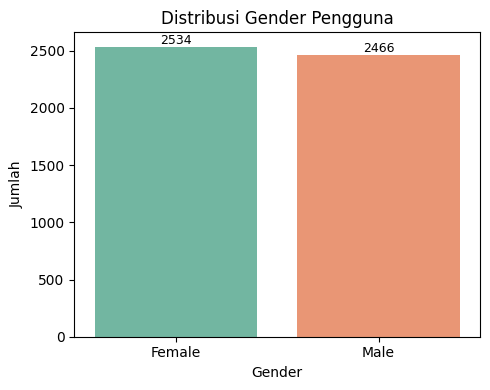

In [4]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df_users, x='gender',hue='gender', palette='Set2')

# Tambahkan label jumlah
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.title('Distribusi Gender Pengguna')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.tight_layout()

# Simpan output
save_plot(plt.gcf(), "gender_distribution.png")

plt.show()


✅ Dari hasil di atas, dapat disimpulkan bahwa distribusi gender pengguna cukup seimbang (atau dominan di salah satu gender tergantung datanya).

---

Selanjutnya kita akan eksplorasi:
- Distribusi usia pengguna
- Kota asal pengguna terbanyak

## 🎂 Distribusi Usia Pengguna

Usia pengguna penting untuk memahami segmentasi umur. Kita akan melihat distribusi umur dan menentukan kelompok usia dominan.

📁 Chart saved to outputs/charts/age_distribution.png


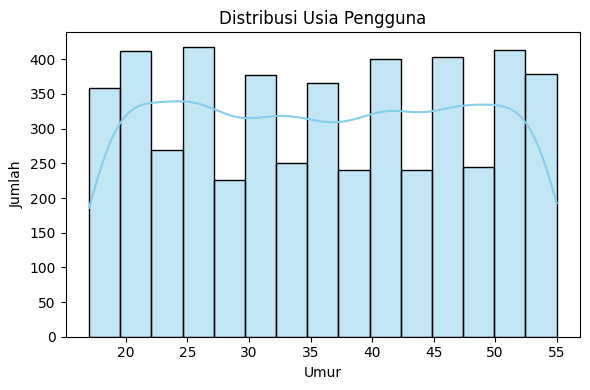

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(df_users['age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.tight_layout()

# Simpan output
save_plot(plt.gcf(), "age_distribution.png")

plt.show()

## 🏙️ Distribusi Kota Pengguna

Mengetahui asal kota pengguna bisa membantu dalam pengambilan keputusan lokasi promosi atau logistik.

📁 Chart saved to outputs/charts/top10cities.png


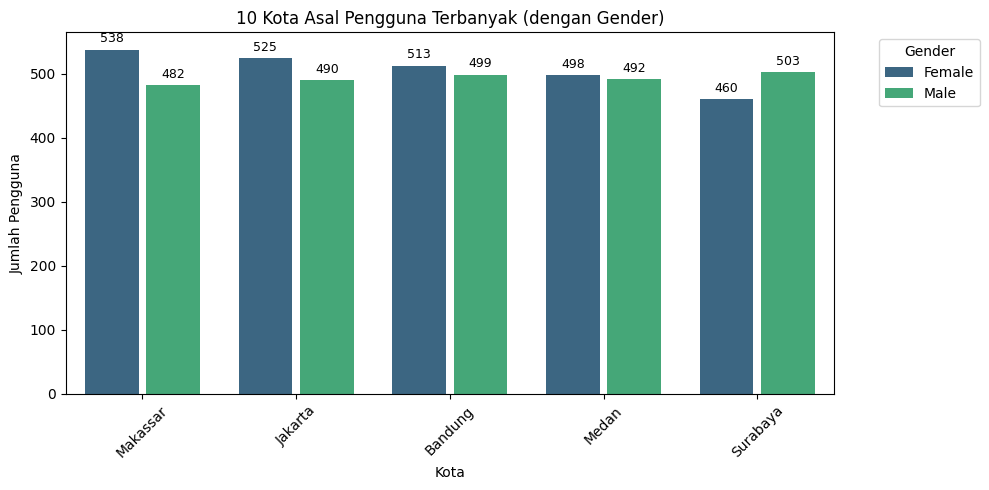

In [27]:
# Ambil top 10 kota
top10 = df_users['city'].value_counts().nlargest(10).index
df_top = df_users[df_users['city'].isin(top10)]

plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_top,
    x='city',
    hue='gender',
    order=top10,
    palette='viridis'
)

# Resize dan rapatkan bar (tanpa bikin mereka renggang)
target_width = 0.35  # Lebar bar yang lebih kecil
for bar in ax.patches:
    current_width = bar.get_width()
    diff = current_width - target_width
    bar.set_width(target_width)
    bar.set_x(bar.get_x() + diff / 2)  # geser biar tetap nempel

# Tambahkan angka di atas bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom',
            fontsize=9
        )

plt.title('10 Kota Asal Pengguna Terbanyak (dengan Gender)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Simpan
save_plot(plt.gcf(), "top10cities.png")
plt.show()


## 📝 Ringkasan Insight

- **Gender**: Distribusi gender pengguna cukup merata (atau condong ke satu sisi).
- **Usia**: Mayoritas pengguna berada pada rentang usia produktif (18–35 tahun).
- **Kota**: Kota seperti Jakarta, Surabaya, dan Bandung menjadi penyumbang pengguna terbanyak.

Selanjutnya, kita akan eksplorasi data **orders** dan **products**.